In [3]:
from functions import *
mplstyle.use(['ggplot', 'fast'])
plt.rcParams.update({
    "text.usetex": True,       
    "font.family": "serif",    
    "font.size": 10, 
})

seed = np.random.seed(2018)

# Hyperparameters from part a and b:
polynomial_degree     = 14
number_of_data_points = 1500
lambda_               = 1e-5
# Hyperparameters from part c, d e and f:*
learning_rate = 0.01
n_iterations  = 2000
tolerance     = 1e-10
use_tol       = True
beta          = 0.9
beta1         = 0.9
beta2         = 0.999
epsilon       = 1e-8
lambda_       = 0.001
batch_size    = 32

In [4]:

#We create the data
train, test, full = make_data(number_of_data_points, seed)

# We start by splitting the data into training and test sets
x_train, x_test, y_train, y_test = train[0], test[0], train[1], test[1]
x_train = x_train.reshape(-1, 1)
x_test  = x_test.reshape(-1, 1)

# Making design matrices based of the scaled and split data
X_train = polynomial_features(x_train, polynomial_degree, intercept=True)
X_test  = polynomial_features(x_test,  polynomial_degree, intercept=True)

In [9]:
methods       = ['gd', 'momentum', 'adagrad', 'rmsprop', 'adam']
results       = {}
learning_rate = 0.001
n_iterations  = 10000
n_epochs      = 50
for method in methods:
    theta_OLS, cost_history_OLS     = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='ols',   learning_rate=learning_rate, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_, n_epochs=n_epochs)
    theta_Ridge, cost_history_Ridge = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='ridge', learning_rate=learning_rate, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_, n_epochs=n_epochs)
    theta_Lasso, cost_history_Lasso = stochastic_gradient_descent_advanced(X_train, y_train, method=method, lr_method='lasso', learning_rate=learning_rate, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_, n_epochs=n_epochs)
    y_pred_OLS   = X_test @ theta_OLS
    y_pred_Ridge = X_test @ theta_Ridge
    y_pred_Lasso = X_test @ theta_Lasso
    mse_OLS   = MSE(y_test, y_pred_OLS)
    r2_OLS    = R2(y_test, y_pred_OLS)
    mse_Ridge = MSE(y_test, y_pred_Ridge)
    r2_Ridge  = R2(y_test, y_pred_Ridge)
    mse_Lasso = MSE(y_test, y_pred_Lasso)
    r2_Lasso  = R2(y_test, y_pred_Lasso)
    results[method] = {
        'theta_OLS'         : theta_OLS,
        'cost_history_OLS'  : cost_history_OLS,
        'mse_OLS'           : mse_OLS,
        'r2_OLS'            : r2_OLS,
        'theta_Ridge'       : theta_Ridge,
        'cost_history_Ridge': cost_history_Ridge,
        'mse_Ridge'         : mse_Ridge,
        'r2_Ridge'          : r2_Ridge,
        'theta_Lasso'       : theta_Lasso,
        'cost_history_Lasso': cost_history_Lasso,
        'mse_Lasso'         : mse_Lasso,
        'r2_Lasso'          : r2_Lasso
    }
    print(f"OLS   : {method}: MSE = {mse_OLS:.6f}, R2 = {r2_OLS:.6f}")
    print(f"Ridge : {method}: MSE = {mse_Ridge:.6f}, R2 = {r2_Ridge:.6f}")
    print(f"Lasso : {method}: MSE = {mse_Lasso:.6f}, R2 = {r2_Lasso:.6f}")
    print()

OLS   : gd: MSE = 0.000213, R2 = 0.294845
Ridge : gd: MSE = 0.000213, R2 = 0.293371
Lasso : gd: MSE = 0.000214, R2 = 0.291862

OLS   : momentum: MSE = 0.000360, R2 = -0.192665
Ridge : momentum: MSE = 0.000360, R2 = -0.190347
Lasso : momentum: MSE = 0.000360, R2 = -0.193199

OLS   : adagrad: MSE = 0.000386, R2 = -0.277132
Ridge : adagrad: MSE = 0.000387, R2 = -0.280032
Lasso : adagrad: MSE = 0.000385, R2 = -0.275108

OLS   : rmsprop: MSE = 0.000112, R2 = 0.629124
Ridge : rmsprop: MSE = 0.000113, R2 = 0.625019
Lasso : rmsprop: MSE = 0.000111, R2 = 0.631558

OLS   : adam: MSE = 0.000157, R2 = 0.480674
Ridge : adam: MSE = 0.000156, R2 = 0.482097
Lasso : adam: MSE = 0.000158, R2 = 0.478002



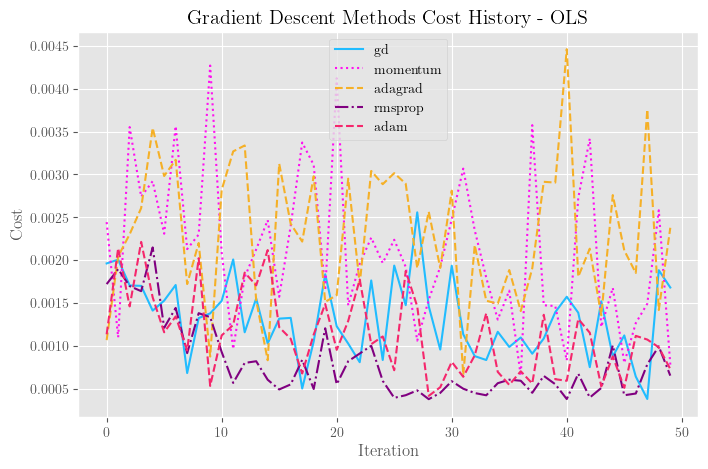

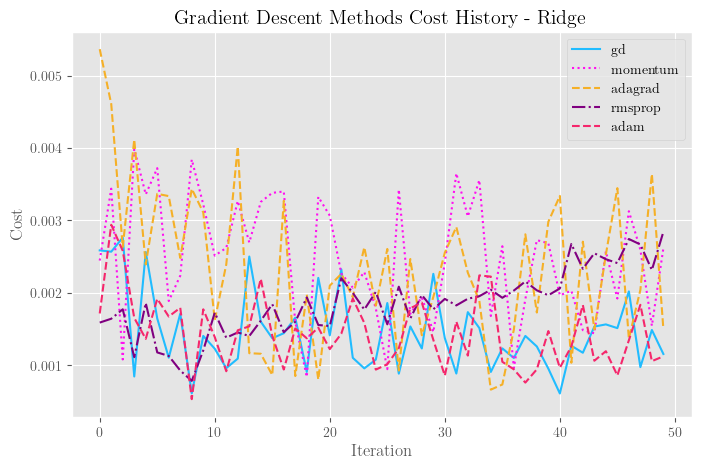

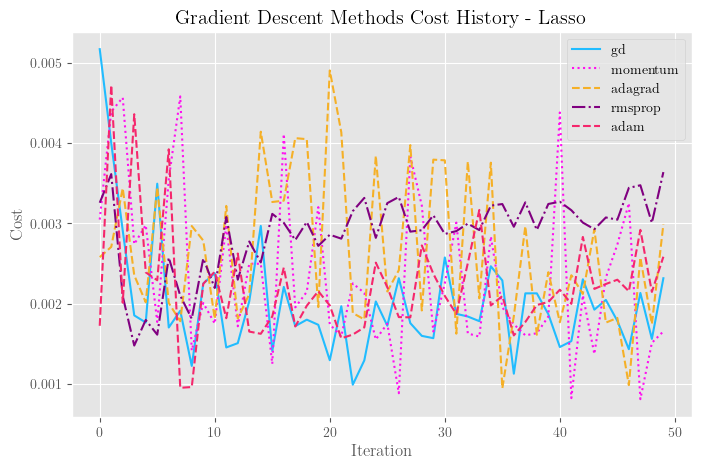

In [10]:
colors_cost_history    = {'gd': '#21BCFF', 'momentum': '#FF10F0', 'adagrad': '#F5B027', 'rmsprop': '#800080', 'adam': '#F5276C'}
linestyle_cost_history = {'gd': '-', 'momentum': ':', 'adagrad': '--', 'rmsprop': '-.', 'adam': '--'}
# Plot cost history for all methods
plt.figure(figsize=(8, 5))
for method in methods:
    plt.plot(results[method]['cost_history_OLS'], label=method, linewidth=1.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])
plt.title("Gradient Descent Methods Cost History - OLS")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()
plt.figure(figsize=(8, 5))
for method in methods:
    plt.plot(results[method]['cost_history_Ridge'], label=method, linewidth=1.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])
plt.title("Gradient Descent Methods Cost History - Ridge")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()
plt.figure(figsize=(8, 5))
for method in methods:
    plt.plot(results[method]['cost_history_Lasso'], label=method, linewidth=1.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])
plt.title("Gradient Descent Methods Cost History - Lasso")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [59]:
theta_lasso_gd, lasso_cost_hist = gradient_descent_lasso(X_train_,y_train,0.1,n_iterations = 100000)
theta2_lasso_gd, lasso2_cost_hist = gradient_descent_lasso(X_train_,y_train,0.1,n_iterations = 100000)


In [60]:
y_pred_gd_lasso = X_test @ theta_lasso_gd
mse_gd_lasso    = MSE(y_test, y_pred_gd_lasso)
r2_gd_lasso     = R2(y_test, y_pred_gd_lasso)

Text(0.5, 1.0, 'LASSO ')

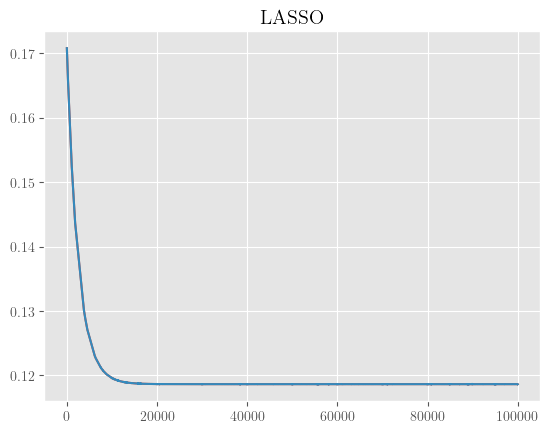

In [61]:
plt.plot(lasso_cost_hist)
plt.plot(lasso_cost_hist)
plt.title("LASSO ")

In [62]:
epochs = 1000
lmbd = 0.1
lr = 0.05

sdg_ols, cost_ols = stochastic_gradient_descent_advanced(X_train_, y_train, method='gd', lr_method='ols', learning_rate=lr, tol=1e-6, use_tol=True, beta=0.9, epsilon=1e-8, lambda_=lmbd, n_epochs = epochs)
sdg_ridge, cost_ridge = stochastic_gradient_descent_advanced(X_train_, y_train, method='gd', lr_method='ridge', learning_rate=lr, tol=1e-6, use_tol=True, beta=0.9, epsilon=1e-8, lambda_=lmbd, n_epochs = epochs)
sdg_lasso, cost_lasso = stochastic_gradient_descent_advanced(X_train_, y_train, method='gd', lr_method='lasso', learning_rate=lr, tol=1e-6, use_tol=True, beta=0.9, epsilon=1e-8, lambda_=lmbd, n_epochs = epochs)
sdg_ols_adam, cost_ols_adam = stochastic_gradient_descent_advanced(X_train_, y_train, method='adam', lr_method='ols', learning_rate=lr, tol=1e-6, use_tol=True, beta=0.9, epsilon=1e-8, lambda_=lmbd, n_epochs = epochs)
sdg_ridge_adam, cost_ridge_adam = stochastic_gradient_descent_advanced(X_train_, y_train, method='adam', lr_method='ridge', learning_rate=lr, tol=1e-6, use_tol=True, beta=0.9, epsilon=1e-8, lambda_=lmbd, n_epochs = epochs)
sdg_lasso_adam, cost_lasso_adam = stochastic_gradient_descent_advanced(X_train_, y_train, method='adam', lr_method='lasso', learning_rate=lr, tol=1e-6, use_tol=True, beta=0.9, epsilon=1e-8, lambda_=lmbd, n_epochs = epochs)

IndexError: list index out of range

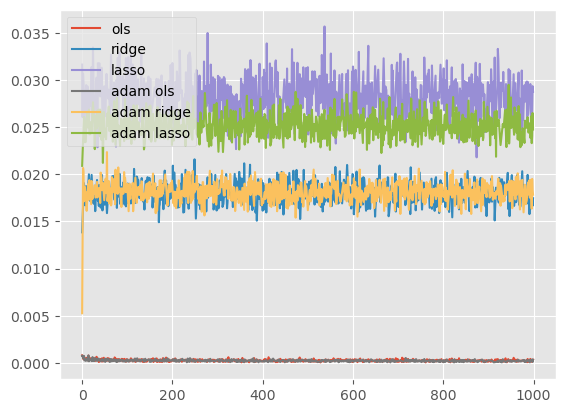

In [ ]:
plt.plot(cost_ols, label = "ols")
plt.plot(cost_ridge, label = "ridge")
plt.plot(cost_lasso, label = "lasso")
plt.plot(cost_ols_adam, label = "adam ols")
plt.plot(cost_ridge_adam, label = "adam ridge")
plt.plot(cost_lasso_adam, label = "adam lasso")
plt.legend()



In [ ]:
y_pred_ols = X_test @ sdg_ols
y_pred_ridge = X_test @ sdg_ridge
y_pred_lasso = X_test @ sdg_lasso
y_pred_ols_adam = X_test @ sdg_ols_adam
y_pred_ridge_adam = X_test @ sdg_ridge_adam
y_pred_lasso_adam = X_test @ sdg_lasso_adam

ols_mse = MSE(y_pred_ols,y_test)
ols_adam_mse = MSE(y_pred_ols_adam,y_test)
ridge_mse = MSE(y_pred_ridge,y_test)
ridge_adam_mse = MSE(y_pred_ridge_adam,y_test)
lasso_mse = MSE(y_pred_lasso,y_test)
lasso_adam_mse = MSE(y_pred_lasso_adam,y_test)

mses = [ols_mse, ols_adam_mse, ridge_mse, ridge_adam_mse, lasso_mse,lasso_adam_mse]

for i in mses:
    print(i)

0.00012121660549171535
0.00011762908309349761
0.0002520778234865803
0.00025499631961714895
0.0003914781926929882
0.00038604293124581225


In [ ]:
gd_ols, cost_gd_ols = gradient_descent_advanced(X_train, y_train, method='gd', lr_method='ols', learning_rate=0.1, n_iterations=100000, tol=1e-6, use_tol=False, beta=0.9, epsilon=1e-8, lambda_=0.01)

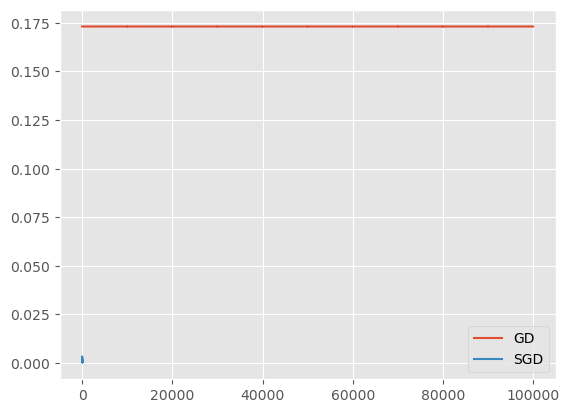

In [ ]:
plt.plot(cost_gd_ols, label= "GD")
plt.plot(cost_ols,label="SGD")
plt.legend()